In [1]:
import numpy as np

In [28]:
x = np.array([[4, 2.9], [2.5, 1], [3.5, 4], [2, 2.1]])

kernel_func = lambda x_i, x_j: np.sum((x_i - x_j) ** 2)
kernel_matrix = np.empty([4, 4])

for j in range(x.shape[0]):
    for i in range(x.shape[0]):
        kernel_matrix[i][j] = kernel_func(x[i], x[j])
        
print(kernel_matrix)

[[ 0.    5.86  1.46  4.64]
 [ 5.86  0.   10.    1.46]
 [ 1.46 10.    0.    5.86]
 [ 4.64  1.46  5.86  0.  ]]


In [37]:
D = np.array([[8, -20], [0, -1], [10, -19], [10, -20], [2, 0]])

print(f"Mean value: {np.mean(D)}\n", f"Covariance matrix: {np.cov(D, rowvar=False)}")

Mean value: -3.0
 Covariance matrix: [[ 22.  -47.5]
 [-47.5 110.5]]


In [38]:
cov_matrix = np.cov(D, rowvar=False)
print(f"Eigenvalues: {np.linalg.eigvals(cov_matrix)}")

Eigenvalues: [  1.33226359 131.16773641]


In [52]:
D_mod = D - D.mean(axis=0)
eigvals, eigvecs = np.linalg.eig(np.cov(D, rowvar=False))
projection = -eigvecs[:, np.argmax(eigvals)]
print(f"First primary component: {np.dot(D_mod, projection)}")

First primary component: [-8.13363886 12.4804344  -8.01463621 -8.93159638 12.59943705]


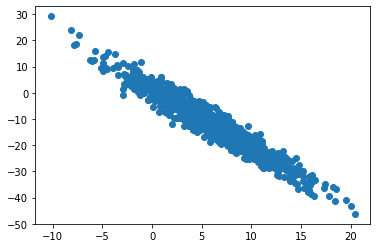

In [55]:
import matplotlib.pyplot as plt

values = np.random.multivariate_normal(
    D.mean(axis=0),
    np.cov(D, rowvar=False),
    1000)

plt.scatter(values[:, 0], values[:, 1]);

In [57]:
from sklearn.decomposition import KernelPCA

transformed = kernel_matrix * 0.1 + np.ones((len(x), len(x))) * 10
print(KernelPCA(1, kernel='precomputed').fit_transform(transformed@kernel_matrix@transformed))

[[ 0.51271419]
 [-0.51271419]
 [-0.51271419]
 [ 0.51271419]]
